In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import random

In [69]:
df = pd.read_csv('clean_data.csv', parse_dates=['SaleDate'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  241 non-null    int64         
 1   SaleDate       241 non-null    datetime64[ns]
 2   ItemTitle      241 non-null    object        
 3   SalePrice      241 non-null    float64       
 4   SalesChannel   241 non-null    object        
 5   Country        241 non-null    object        
 6   Quantity       241 non-null    int64         
 7   Brand          241 non-null    object        
 8   Category       241 non-null    object        
 9   SaleYear       241 non-null    int64         
 10  SaleMonth      241 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 20.8+ KB


In [24]:
df.head(5)

,TransactionID,SaleDate,ItemTitle,SalePrice,SalesChannel,Country,Quantity,Brand,Category,SaleYear,SaleMonth
0,2245,2024-12-30,BNIB Chanel 25C Beige Grained Leather CC Clutc...,4680.0,Organic,United States,1,Chanel,Handbag,2024,December
1,2244,2024-12-25,NEW Chanel Coco Neige 2024/2025 Black White CC...,1890.0,Organic,United States,1,Chanel,Accessories,2024,December
2,2243,2024-12-25,Hermes Birkin 25 Rouge H Togo Gold Hardware Y ...,19990.0,Organic,United States,1,Hermès,Handbag,2024,December
3,2242,2024-12-25,Chanel 22A CC Logo Sneakers White/Black 37.5 BNIB,1799.0,Organic,United States,1,Chanel,Shoes,2024,December
4,2241,2024-12-25,BNIB Hermes Funny Ice Cream Twilly Beige / Crè...,189.0,Organic,United States,1,Hermès,Other,2024,December


In [44]:
# 1. What are the top-performing brands and product categories?
# Top Brands by Revenue
top_brands_revenue = df.groupby('Brand')['SalePrice'].sum().sort_values(ascending=False)
top_brands_revenue

Brand
Hermès           789031.05
Chanel           135681.00
Other             33960.00
Rolex             26329.00
Goyard            15054.00
Dior               5995.00
Louis Vuitton      1999.00
Prada               981.00
Gucci               699.30
Name: SalePrice, dtype: float64

In [34]:
# Top Brands by Quantity
top_brands_quantity = df.groupby('Brand')['Quantity'].sum().sort_values(ascending=False)
top_brands_quantity

Brand
Hermès           175
Chanel            42
Other             12
Goyard             6
Rolex              2
Dior               1
Gucci              1
Louis Vuitton      1
Prada              1
Name: Quantity, dtype: int64


In [35]:
# Top Categories by Revenue
top_categories_revenue = df.groupby('Category')['SalePrice'].sum().sort_values(ascending=False)
top_categories_revenue

Category
Handbag        663503.10
Other          197548.25
Jewelry         63249.00
Watch           45649.00
Accessories     21520.00
Shoes           18260.00
Name: SalePrice, dtype: float64


In [36]:
# Top Categories by Quantity
top_categories_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
top_categories_quantity

Category
Other          113
Handbag         67
Accessories     28
Jewelry         15
Shoes           13
Watch            5
Name: Quantity, dtype: int64


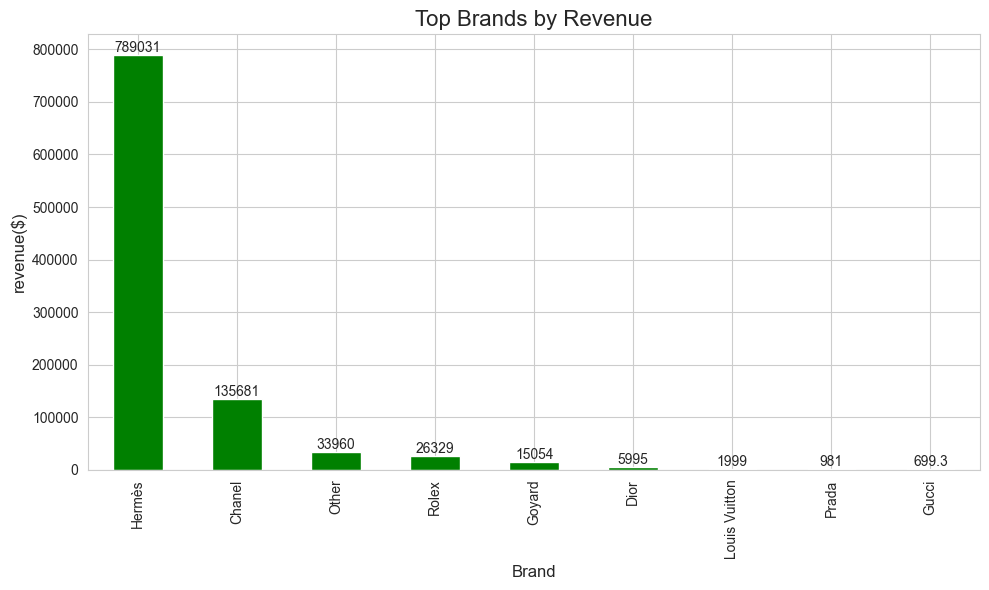

In [54]:
plt.figure(figsize=(10, 6))
tbr = top_brands_revenue.plot(kind='bar', color='green')
for container in tbr.containers:
    tbr.bar_label(container, label_type='edge')
plt.title('Top Brands by Revenue', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('revenue($)', fontsize=12)
plt.tight_layout()
plt.show()

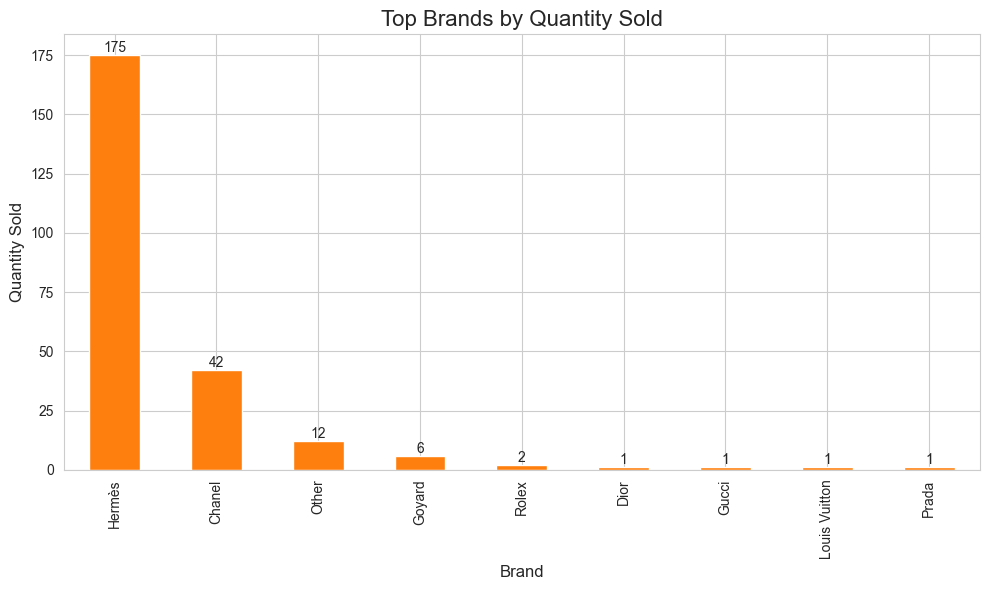

In [55]:
plt.figure(figsize=(10, 6))
tbq = top_brands_quantity.plot(kind='bar', color='C1')
for container in tbq.containers:
    tbq.bar_label(container, label_type='edge')
plt.title('Top Brands by Quantity Sold', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.tight_layout()
plt.show()

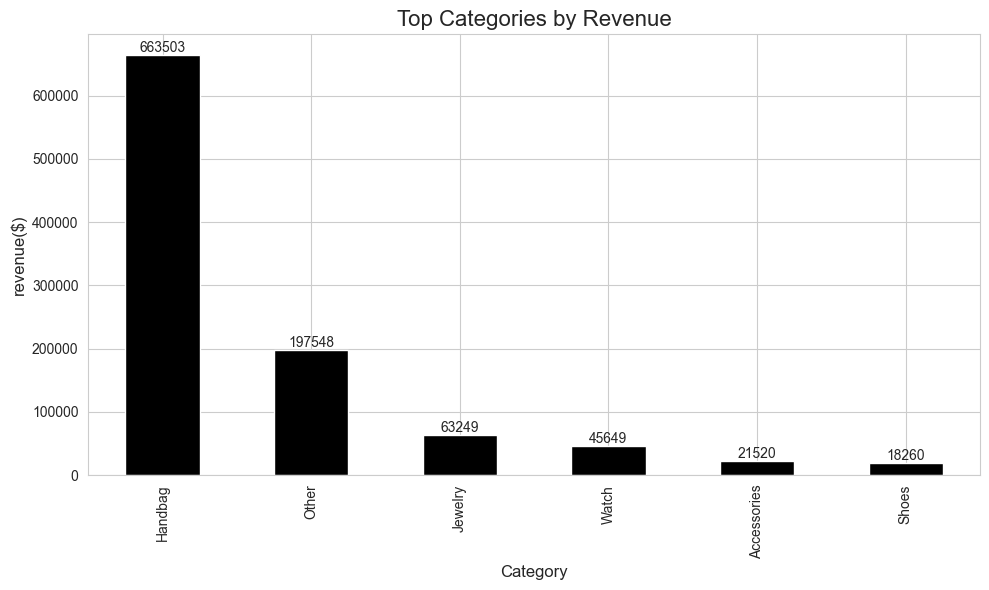

In [56]:
plt.figure(figsize=(10, 6))
tcr = top_categories_revenue.plot(kind='bar', color='black')
for container in tcr.containers:
    tcr.bar_label(container, label_type='edge')
plt.title('Top Categories by Revenue', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('revenue($)', fontsize=12)
plt.tight_layout()
plt.show()

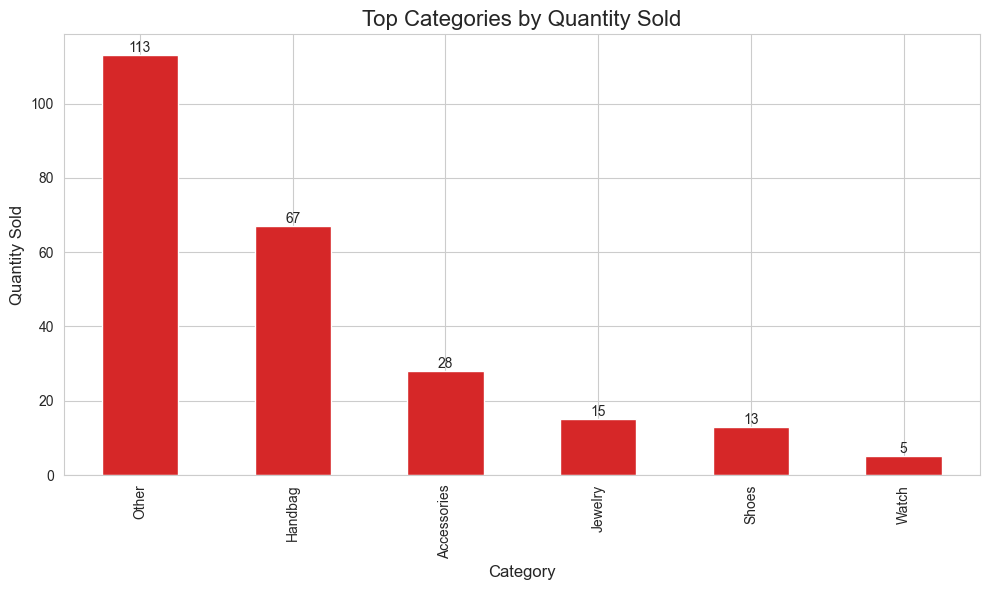

In [57]:
plt.figure(figsize=(10, 6))
tcq = top_categories_quantity.plot(kind='bar', color='C3')
for container in tcq.containers:
    tcq.bar_label(container, label_type='edge')
plt.title('Top Categories by Quantity Sold', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# --Top Performers (Brand & Category): Hermès is the most dominant brand, generating significantly more revenue than any other.
# --Correspondingly, Handbags is the top-selling category with the highest revenue.

In [74]:
df.head(5)

,TransactionID,SaleDate,ItemTitle,SalePrice,SalesChannel,Country,Quantity,Brand,Category,SaleYear,SaleMonth
0,2245,2024-12-30,BNIB Chanel 25C Beige Grained Leather CC Clutc...,4680.0,Organic,United States,1,Chanel,Handbag,2024,December
1,2244,2024-12-25,NEW Chanel Coco Neige 2024/2025 Black White CC...,1890.0,Organic,United States,1,Chanel,Accessories,2024,December
2,2243,2024-12-25,Hermes Birkin 25 Rouge H Togo Gold Hardware Y ...,19990.0,Organic,United States,1,Hermès,Handbag,2024,December
3,2242,2024-12-25,Chanel 22A CC Logo Sneakers White/Black 37.5 BNIB,1799.0,Organic,United States,1,Chanel,Shoes,2024,December
4,2241,2024-12-25,BNIB Hermes Funny Ice Cream Twilly Beige / Crè...,189.0,Organic,United States,1,Hermès,Other,2024,December


In [67]:
# 2. Which sales channel has the highest conversion rate and average order value?
# Revenue by Channel
revenue_by_channel = df.groupby('SalesChannel')['SalePrice'].sum()
revenue_by_channel

SalesChannel
Organic     923918.55
Promoted     85810.80
Name: SalePrice, dtype: float64

In [72]:
# Totals Order by Channel
orders_by_channel = df.groupby('SalesChannel')['TransactionID'].count()
orders_by_channel

SalesChannel
Organic     223
Promoted     18
Name: TransactionID, dtype: int64

In [68]:
# Average Order Value
aov_by_channel = (revenue_by_channel / orders_by_channel).sort_values(ascending=False)
aov_by_channel

SalesChannel
Promoted    4767.266667
Organic     4143.132511
dtype: float64

In [ ]:
# --Channel Performance (AOV & Conversion): Average Order Value (AOV): The 'Organic' channel has the highest Average Order Value.
# --Conversion Rate: This cannot be calculated from the available data. 
# --We only have data on successful sales, not the total visitor data needed to determine a conversion ratio.

In [ ]:
# 3. What is the average discount rate by brand and condition?
# --Discount Rate: This cannot be calculated from the available data. 
# --We only have the final Sale Price but are missing the Original Price for comparison.

In [75]:
df.head(5)

,TransactionID,SaleDate,ItemTitle,SalePrice,SalesChannel,Country,Quantity,Brand,Category,SaleYear,SaleMonth
0,2245,2024-12-30,BNIB Chanel 25C Beige Grained Leather CC Clutc...,4680.0,Organic,United States,1,Chanel,Handbag,2024,December
1,2244,2024-12-25,NEW Chanel Coco Neige 2024/2025 Black White CC...,1890.0,Organic,United States,1,Chanel,Accessories,2024,December
2,2243,2024-12-25,Hermes Birkin 25 Rouge H Togo Gold Hardware Y ...,19990.0,Organic,United States,1,Hermès,Handbag,2024,December
3,2242,2024-12-25,Chanel 22A CC Logo Sneakers White/Black 37.5 BNIB,1799.0,Organic,United States,1,Chanel,Shoes,2024,December
4,2241,2024-12-25,BNIB Hermes Funny Ice Cream Twilly Beige / Crè...,189.0,Organic,United States,1,Hermès,Other,2024,December


In [78]:
# 4. Are there seasonal trends or monthly sales fluctuations?
df['YearMonth'] = df['SaleDate'].dt.to_period('M')

In [79]:
monthly_revenue = df.groupby('YearMonth')['SalePrice'].sum()
monthly_revenue

YearMonth
2024-01    175504.00
2024-02     93260.30
2024-03    107771.20
2024-04     86556.00
2024-05     44070.05
2024-06     69530.00
2024-07     75836.00
2024-08     46824.80
2024-09     29497.00
2024-10     36488.00
2024-11     39310.00
2024-12    205082.00
Freq: M, Name: SalePrice, dtype: float64

In [81]:
monthly_quantity = df.groupby('YearMonth')['Quantity'].sum()
monthly_quantity

YearMonth
2024-01    28
2024-02    27
2024-03    40
2024-04    24
2024-05    19
2024-06    19
2024-07    15
2024-08    15
2024-09     8
2024-10     8
2024-11    12
2024-12    26
Freq: M, Name: Quantity, dtype: int64

In [85]:
df['SaleMonthNum'] = df['SaleDate'].dt.month
seasonal_data = df.groupby(['SaleMonthNum', 'SaleMonth'])['SalePrice'].sum().reset_index()
seasonal_data

,SaleMonthNum,SaleMonth,SalePrice
0,1,January,175504.00
1,2,February,93260.30
2,3,March,107771.20
3,4,April,86556.00
4,5,May,44070.05
5,6,June,69530.00
6,7,July,75836.00
7,8,August,46824.80
8,9,September,29497.00
9,10,October,36488.00


In [ ]:
# --Seasonal Trends: Yes, there are clear monthly fluctuations and seasonal trends. Sales show a significant peak in December, 
# --indicating very strong end-of-year performance.

In [86]:
# 5. Which countries are your strongest markets?
top_countries_revenue = df.groupby('Country')['SalePrice'].sum().sort_values(ascending=False)
top_countries_revenue

Country
United States     929728.35
United Kingdom     25949.00
Italy              21550.00
Canada              9230.00
Switzerland         7830.00
Brunei              4220.00
Singapore           3870.00
Germany             2880.00
Australia           1997.00
Qatar               1278.00
Taiwan              1197.00
Name: SalePrice, dtype: float64

In [87]:
top_countries_quantity = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
top_countries_quantity

Country
United States     227
United Kingdom      3
Australia           2
Germany             2
Brunei              1
Canada              1
Italy               1
Qatar               1
Singapore           1
Switzerland         1
Taiwan              1
Name: Quantity, dtype: int64

In [ ]:
# --Strongest Market: The United States is, by a very large margin, your strongest market. 
# --It absolutely dominates in both total revenue and total quantity sold.